# Analyse Markov blankets with DAGMetrics

In [9]:
library(bnlearn)
library(DAGMetrics)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Create random DAG

In [6]:
set.seed(123)
nodes <- 100
prob <- 0.01
bn_1 <- random.graph(nodes = paste0("S", 1:nodes), method = "ordered", prob = prob)
bn_2 <- random.graph(nodes = paste0("S", 1:nodes), method = "ordered", prob = prob)

In [7]:
nodes_bn1 = nodes(bn_1)
nodes_bn2 = nodes(bn_2)
result_table_12 <- compare_dags(bn_1, bn_2,
                                descriptive_metrics = c("n_nodes", "n_edges",
                                                        "n_colliders", "n_isolated_nodes"),
                                comparison_metrics = c(""))

In [16]:
bn1_metrics <-
  result_table_12 %>%
  filter(Variable %in% nodes_bn1) %>%
  dplyr::select(base_n_nodes, base_n_edges, base_n_colliders, base_n_isolated_nodes) %>%
  mutate(group = "DAG1") %>%
  rename(n_nodes = base_n_nodes,
         n_edges = base_n_edges,
         n_colliders = base_n_colliders,
         n_isolated_nodes = base_n_isolated_nodes)
bn2_metrics <-
  result_table_12 %>%
  filter(Variable %in% nodes_bn2) %>%
  dplyr::select(n_nodes, n_edges, n_colliders, n_isolated_nodes) %>%
  mutate(group = "DAG2")

metrics = rbind(bn1_metrics, bn2_metrics)
data_long <- metrics %>%
  pivot_longer(
    cols = c(n_nodes, n_edges, n_colliders, n_isolated_nodes),
    names_to = "Metric",
    values_to = "Value"
  )
data_long$Value <- factor(data_long$Value)


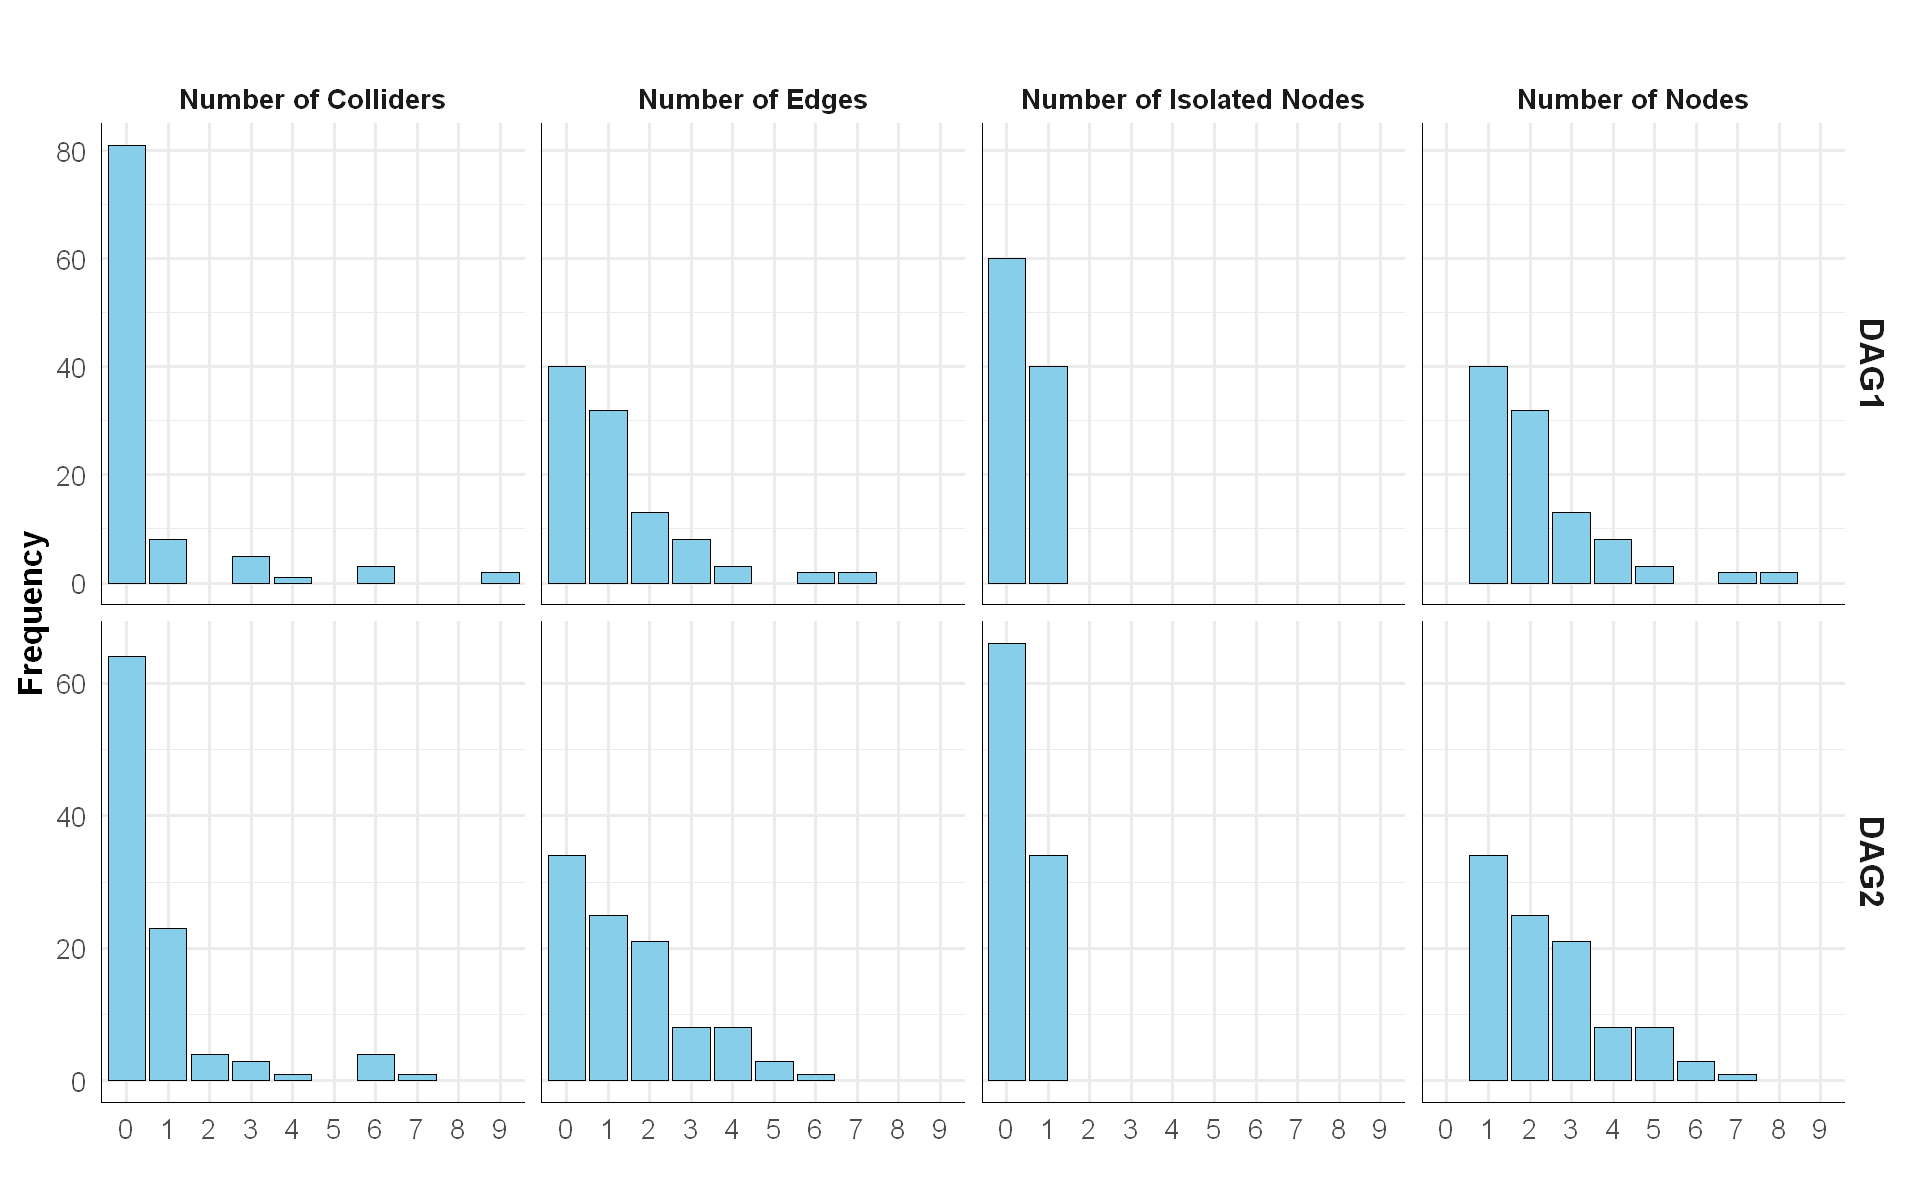

In [19]:
options(repr.plot.width = 16, repr.plot.height = 10)

ggplot(data_long, aes(x = Value)) +
  geom_bar(fill = "skyblue", color = "black") + 
  facet_grid(group ~ Metric, scales = "free_y",
             labeller = labeller(
               Metric = c(
                 n_nodes = "Number of Nodes",
                 n_edges = "Number of Edges",
                 n_colliders = "Number of Colliders",
                 n_isolated_nodes = "Number of Isolated Nodes"
               ))) +
  theme_minimal(base_size = 20)+
  annotate("segment", x=-Inf, xend=Inf, y=-Inf, yend=-Inf)+
  annotate("segment", x=-Inf, xend=-Inf, y=-Inf, yend=Inf)+ 
  labs(
    title = "",
    x = "",
    y = "Frequency"
  ) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    axis.title = element_text(face = "bold"),
    strip.text = element_text(face = "bold"),
    strip.text.y = element_text(size = 20, face = "bold")
  ) +
  coord_cartesian(clip = "off")